## 2.3. GIẢI THUẬT 3: BAYES NGÂY THƠ (NAÏVE BAYES)

# 2.3.1. Ôn tập lý thuyết

# 2.3.2. Bài làm mẫu

Bài toán 1: Xây dựng mô hình dữ liệu bằng giải thuật Bayes ngây thơ trên tập dữ liệu lấy tại
https://www.kaggle.com/code/zabihullah18/email-spam-detection

Nhiệm vụ 1: Phân loại sử dụng Naïve Bays

1. Import thư viện và nạp dữ liệu vào notebook

In [8]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('data/spam (1).csv', encoding='latin-1')
#display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


2. Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu

In [9]:
# Xóa các cột thừa (Unnamed: 2, 3, 4)
cols_to_drop = [c for c in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if c in data.columns]
if cols_to_drop:
    data = data.drop(columns=cols_to_drop, axis=1)

# Đổi tên cột cho dễ hiểu
data.columns = ['label', 'text']

# Phân chia đặc trưng (X) và nhãn (y)
X = data['text']
y = data['label']

# Tách dữ liệu train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Xây dựng vector hóa nội dung HAM | SPAM của tập train và tập test

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit và biến đổi tập huấn luyện (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train)

# Biến đổi tập kiểm tra (X_test)
X_test_vectorized = vectorizer.transform(X_test)

4. Xây dựng mô hình Naïve Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

5. Đánh giá hiệu quả của mô hình

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# 2.3.3. Bài tập thực hành 1

Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng lấy tại
https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

1. Import thư viện và nạp dữ liệu vào notebook

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv("data/Customer_Behaviour.csv")

print("Thông tin dữ liệu:")
print(data.info())
print("\n5 dòng đầu tiên:")
print(data.head())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

5 dòng đầu tiên:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


2. Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu

In [23]:
# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu:")
print(data.isnull().sum())

# Loại bỏ các giá trị thiếu (nếu có)
data.dropna(inplace=True)

# Mã hóa các cột dạng chữ thành số (Label Encoding)
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

print("\nDữ liệu sau khi mã hóa:")
print(data.head())

# Chia dữ liệu đặc trưng (X) và nhãn (y)
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Tách dữ liệu train/test theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Số lượng giá trị thiếu:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Dữ liệu sau khi mã hóa:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


3. Xây dựng vector hóa nội dung HAM | SPAM của tập train và tập test

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Xây dựng mô hình Naïve Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)


GaussianNB()

5. Đánh giá hiệu quả của mô hình


Độ chính xác mô hình: 0.8750

Ma trận nhầm lẫn:
 [[47  4]
 [ 6 23]]

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        51
           1       0.85      0.79      0.82        29

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.88      0.87        80



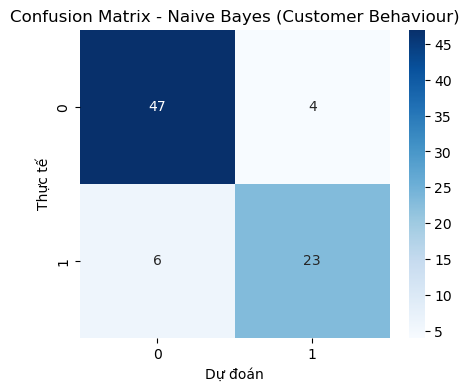

In [28]:
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nĐộ chính xác mô hình: {acc:.4f}")
print("\nMa trận nhầm lẫn:\n", cm)
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Naive Bayes (Customer Behaviour)")
plt.show()

# 2.3.4. Bài tập thực hành 2

Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom. Dữ liệu lấy tại
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

1. Import thư viện và nạp dữ liệu vào notebook

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("data/mushrooms.csv")

print("Thông tin dữ liệu:")
print(data.info())
print("\n5 dòng đầu tiên:")
print(data.head())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk

2. Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu

In [31]:
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

print("\nDữ liệu sau khi mã hóa:")
print(data.head())

# Chia dữ liệu đặc trưng (X) và nhãn (y)
# Cột "class" là nhãn: edible (e) hoặc poisonous (p)
X = data.drop('class', axis=1)
y = data['class']

# Tách dữ liệu train/test theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



Dữ liệu sau khi mã hóa:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type 

3. Xây dựng vector

4. Xây dựng mô hình Naïve Bayes

In [32]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

5. Đánh giá hiệu quả của mô hình


Độ chính xác mô hình: 0.9286

Ma trận nhầm lẫn:
 [[778  64]
 [ 52 731]]

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       842
           1       0.92      0.93      0.93       783

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



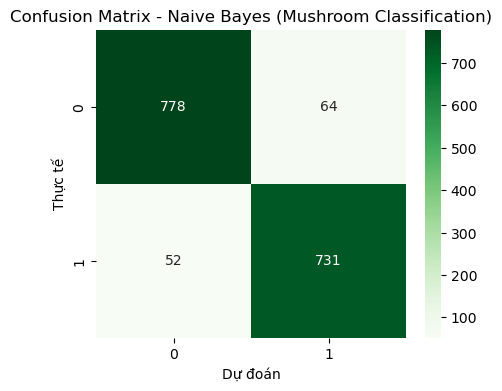

In [33]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nĐộ chính xác mô hình: {acc:.4f}")
print("\nMa trận nhầm lẫn:\n", cm)
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Naive Bayes (Mushroom Classification)")
plt.show()